# Importações do Python

In [14]:
%pip install pillow

In [15]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import time
from collections import Counter
from operator import itemgetter

# Abertura e Leitura do Arquivo

In [16]:
fornecedor=[]
destinos=[]
valor_respiradores=[]
data_entrega=[]
qnt_respiradores=[]

with open('distribuicao_respiradores_new.csv', newline='') as dist:
  leitor = csv.DictReader(dist)
  for key in leitor:
    for i in range(len(key)):
      fornecedor.append(key['FORNECEDOR'])
      qnt_respiradores.append(int(key['QUANTIDADE']))
      destinos.append(key['DESTINO'])
      valor_respiradores.append(float(key['VALOR']))
      data_entrega.append(key['DATA'])

# Códigos Utilizados na Análise

Código do Quick Sort:

In [17]:
#Função do Prof. Hallison Paz (Infnet) com ordenação por QuickSort
# Vídeo "Quick Sort": https://youtu.be/wx5juM9bbFo
def quicksort(lista, inicio=0, fim=None):
    if fim is None:
        fim = (len(lista)-1)
    if inicio < fim:
        p = partition(lista, inicio, fim)
        # recursivamente na sublista à esquerda (menores)
        quicksort(lista, inicio, p-1)
        # recursivamente na sublista à direita (maiores)
        quicksort(lista, p+1, fim)

def partition(lista, inicio, fim):
    pivot = lista[fim]
    i = inicio
    for j in range(inicio, fim):
        # j sempre avança, pois representa o elementa em análise
        # e delimita os elementos maiores que o pivô
        if lista[j] <= pivot:
            lista[j], lista[i] = lista[i], lista[j]
            # incrementa-se o limite dos elementos menores que o pivô
            i = i + 1
    lista[i], lista[fim] = lista[fim], lista[i]
    return i

Código do Counting Sort:

In [18]:
#Função do Prof. André Backes (UFU) com ordenação por CountingSort
#Adaptada para o Python pelo autor do trabalho
#Vídeo "Counting Sort": https://www.youtube.com/watch?v=En8daEdcpJU&ab_channel=LinguagemCPrograma%C3%A7%C3%A3oDescomplicada

def countingsort(lista):
  fim=len(lista)
  baldes=[0 for i in range(2000)]

  for j in range(fim):
    baldes[lista[j]] += 1

  i=0
  for j in range(2000):
    k=baldes[j]
    while k>0:
      lista[i]=j
      i+=1
      k-=1

Código do Selection Sort:

In [19]:
#Código do Prof. Fabio Kon (prof do IME/USP) no Algoritmo de Seleção
#Link do vídeo: https://www.youtube.com/watch?v=JggjFK5PkMs&ab_channel=CCSLdoIME%2FUSP

def selecao(lista):
  fim=len(lista)
  for i in range(fim-1):
    posicao_minimo = i
    for j in range(i+1, fim):
      if lista[j] < lista[posicao_minimo]:
        posicao_minimo = j

      lista[i], lista[posicao_minimo] = lista[posicao_minimo], lista[i]

# Análise do Arquivo

Primeira Questão - Qual a média dos valores dos respiradores?

In [20]:
def media(lst, lista): 
    return sum(lst) / sum(lista) 

#Utilizando a função media, temos

valor_medio = media(valor_respiradores, qnt_respiradores)
print(f'O valor medio é {valor_medio}')

O valor medio é 52431.45742149624


Segunda Questão - Quais foram as maiores quantidades de respiradores distribuídos dentro de uma determinada encomenda? Plote o gráfico das quantidades

Quantidade no Quick Sort:

In [21]:
quantidade = qnt_respiradores

#Para que o quicksort rodasse com a quantidade de valores dentro do colab, utilizamos essa funcao para aumentar a quantidade de recursoes permitidas
sys.setrecursionlimit(max(sys.getrecursionlimit(), len(quantidade)+10000))

ini=time.time()
quicksort(quantidade)
fim=time.time()

print(quantidade)
print(len(quantidade))
print(f'Tempo de execução: {fim-ini} segundos')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Quantidade no Counting Sort:

In [22]:
quantidade = qnt_respiradores
fim_vet = len(quantidade)

ini=time.time()
countingsort(quantidade)
fim=time.time()

print(quantidade)
print(len(quantidade))
print(f'Tempo de execução: {fim-ini} segundos')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Quantidade no Selection Sort:

In [23]:
quantidade = qnt_respiradores
fim_vet = len(quantidade)

ini=time.time()
selecao(quantidade)
fim=time.time()

print(quantidade)
print(len(quantidade))
print(f'Tempo de execução: {fim-ini} segundos')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Gráfico e Ordenação por Quick Sort do Counter das Quantidades:

[4163, 4271, 1622, 713, 2934, 416, 263, 219, 43, 1800, 33, 44, 44, 86, 396, 21, 55, 53, 32, 578, 32, 22, 44, 109, 11, 22, 307, 33, 10, 152, 10, 21, 10, 21, 11, 120, 22, 11, 65, 11, 33, 33, 11, 33, 11, 11, 11]
[10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 21, 21, 21, 22, 22, 22, 32, 32, 33, 33, 33, 33, 33, 43, 44, 44, 44, 53, 55, 65, 86, 109, 120, 152, 219, 263, 307, 396, 416, 578, 713, 1622, 1800, 2934, 4163, 4271]
47
Tempo de execução: 8.916854858398438e-05 segundos


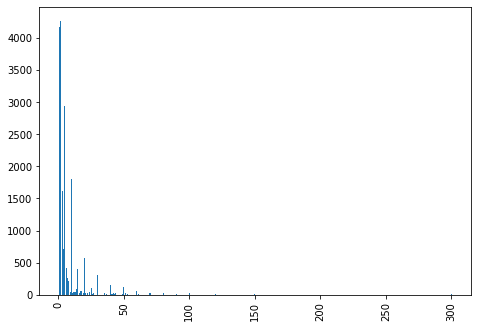

In [24]:
dict_quantidade = dict(Counter(quantidade))
lista=[]
lista_valores=[]
lista=list(dict_quantidade.items())
for i in range(len(lista)):
  tupla = lista[i]
  lista_valores.append(tupla[1])

print(lista_valores) 

ini=time.time()
quicksort(lista_valores)
fim=time.time()

print(lista_valores)
print(len(lista_valores))
print(f'Tempo de execução: {fim-ini} segundos')

tuplas = sorted(dict_quantidade.items(), key=itemgetter(1), reverse=False)

lista_chaves=[]

for i in range(len(tuplas)):
  tupla = tuplas[i]
  lista_chaves.append(tupla[0])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(lista_chaves, lista_valores)
plt.savefig('quantidade.png', bbox_inches = "tight")
plt.show()

Terceira Questão - Quais foram os destinos mais escolhidos em encomendas? Mostre por meio de um gráfico.

Gráfico e Ordenação por meio do Selection Sort do Counter dos Fornecedores:

[4988, 8563, 3174, 1051, 11, 11, 339, 682, 11, 55, 33, 11, 11, 11, 11, 11]
[11, 11, 11, 11, 11, 11, 11, 11, 33, 55, 682, 339, 1051, 3174, 4988, 8563]
16
Tempo de execução: 5.602836608886719e-05 segundos


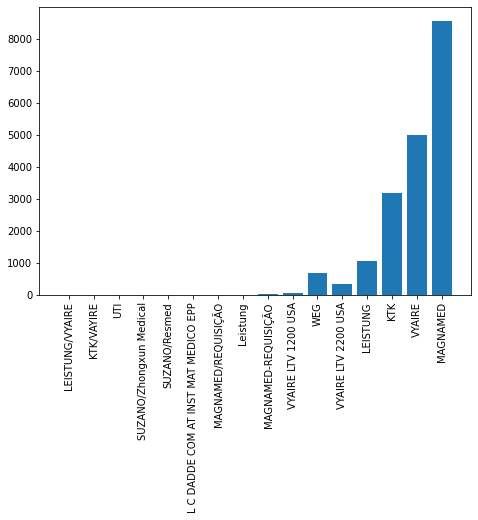

In [25]:
dict_fornecedor = dict(Counter(fornecedor))
lista=[]
lista_valores=[]
lista=list(dict_fornecedor.items())
for i in range(len(lista)):
  tupla = lista[i]
  lista_valores.append(tupla[1])

print(lista_valores) 

ini=time.time()
selecao(lista_valores)
fim=time.time()

print(lista_valores)
print(len(lista_valores))
print(f'Tempo de execução: {fim-ini} segundos')

#Como eu não sabia ordenar usando as tuplas, utilizei o sorted simplesmente para plotar os gráficos

tuplas = sorted(dict_fornecedor.items(), key=itemgetter(1), reverse=False)

lista_chaves=[]

for i in range(len(tuplas)):
  tupla = tuplas[i]
  lista_chaves.append(tupla[0])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(lista_chaves, lista_valores)
plt.savefig('fornecedor.png', bbox_inches = "tight")
plt.show()

Quarta Questão - Quais foram os fornecedores que realizaram mais encomendas? Mostre por meio de um gráfico.

Gráfico e Ordenação por meio do Counting Sort do Counter dos Destinos:

[1434, 275, 1713, 118, 660, 1533, 471, 440, 110, 1799, 825, 110, 416, 352, 252, 121, 429, 438, 603, 176, 985, 418, 649, 1285, 1626, 308, 1416, 11]
[11, 110, 110, 118, 121, 176, 252, 275, 308, 352, 416, 418, 429, 438, 440, 471, 603, 649, 660, 825, 985, 1285, 1416, 1434, 1533, 1626, 1713, 1799]
28
Tempo de execução: 0.0002529621124267578 segundos


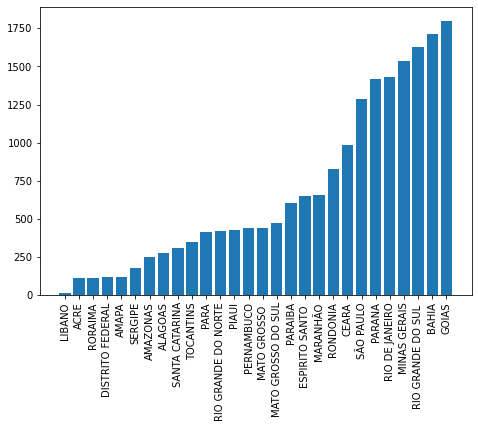

In [26]:
dict_destinos = dict(Counter(destinos))
lista=[]
lista_valores=[]
lista=list(dict_destinos.items())
for i in range(len(lista)):
  tupla = lista[i]
  lista_valores.append(tupla[1])

print(lista_valores) 

ini=time.time()
countingsort(lista_valores)
fim=time.time()

print(lista_valores)
print(len(lista_valores))
print(f'Tempo de execução: {fim-ini} segundos')

tuplas = sorted(dict_destinos.items(), key=itemgetter(1), reverse=False)

lista_chaves=[]

for i in range(len(tuplas)):
  tupla = tuplas[i]
  lista_chaves.append(tupla[0])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(lista_chaves, lista_valores)
plt.savefig('destinos.png', bbox_inches = "tight")
plt.show()